## Libraries   

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## 1.Data

In [2]:
data_dir = '../data/'

# data format in rating file: user id | item id | rating | timestamp
rating_file = os.path.join(data_dir, 'u.data')

# data format in u.user file: number of user id | age | gender | occupation | zip code
user_file = os.path.join(data_dir, 'u.user')

''' data format in u.item file: movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western '''
movie_file = os.path.join(data_dir, 'u.item')

genre_file = os.path.join(data_dir, 'u.genre')

occupation_file = os.path.join(data_dir, 'u.occupation')

In [3]:
# loading the data to dataframes
df_rating = pd.read_csv(rating_file, sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_user = pd.read_csv(user_file, sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zipcode'])
df_movie = pd.read_csv(movie_file, sep='|', header=None, names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb URL', 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western'], encoding='latin-1')
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])

In [4]:
# Finding the different genres
genre = pd.read_csv(genre_file, sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [5]:
# Finding the different occupations
occupation = pd.read_csv(occupation_file, sep="|", encoding='latin-1', header=None)
occupation.columns = ['Occupations']
occupation_list = list(occupation['Occupations'])
occupation_list

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

In [6]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 120]
age_labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]
df_user["age_range"] = pd.cut(df_user["age"], bins=age_bins, labels=age_labels)

In [7]:
merged_df = pd.merge(df_rating, df_user, on="user_id")
merged_df = pd.merge(merged_df, df_movie[["movie_id", "title"] + genre_list],
                     on="movie_id")

## 2 Ratings Analysis

In [8]:
df_rating.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


There are more than 100k user ratings with 4 attributes: user id, movie id, rating and timestamp. The timestamp column is detected as integer. We can convert it to timestamp type and extract year and month and sort the records by timestamp.

In [10]:
df_rating['timestamp'] = df_rating['timestamp'].apply(datetime.fromtimestamp)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['date'] = df_rating['timestamp'].dt.date
df_rating = df_rating.sort_values('timestamp').reset_index(drop=True)

In [11]:
df_rating.head()

,user_id,movie_id,rating,timestamp,year,month,date
0,259,255,4,1997-09-20 08:35:10,1997,9,1997-09-20
1,259,286,4,1997-09-20 08:35:27,1997,9,1997-09-20
2,259,298,4,1997-09-20 08:35:54,1997,9,1997-09-20
3,259,185,4,1997-09-20 08:36:21,1997,9,1997-09-20
4,259,173,4,1997-09-20 08:37:23,1997,9,1997-09-20


In [12]:
df_rating.tail()

,user_id,movie_id,rating,timestamp,year,month,date
99995,729,689,4,1998-04-23 04:40:38,1998,4,1998-04-23
99996,729,313,3,1998-04-23 04:40:38,1998,4,1998-04-23
99997,729,328,3,1998-04-23 04:40:38,1998,4,1998-04-23
99998,729,748,4,1998-04-23 04:40:38,1998,4,1998-04-23
99999,729,272,4,1998-04-23 04:40:38,1998,4,1998-04-23


Let's explore some more statistics from the modified dataframe.

In [13]:
print('Years:', df_rating.year.unique())
print('Months', df_rating.month.unique())
print('#Unique users:', df_rating.user_id.nunique())
print('#Unique movies:', df_rating.movie_id.nunique())
print('Unique ratings:', df_rating.rating.unique())
print('Average rating:', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:')
print(df_rating['rating'].value_counts())

Years: [1997 1998]
Months [ 9 10 11 12  1  2  3  4]
#Unique users: 943
#Unique movies: 1682
Unique ratings: [4 3 5 2 1]
Average rating: 3.53
Frequency of each rating value:
rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64


We can see that data is from the duration: Sep 1997 to Apr 1998<br>
943 unique users rated 1682 movies in total.<br>
The rating values are ranging from 1 to 5. 
The average rating is around 3.53 and most frequent rating value is 4.

Now, let's see the number of ratings for each year.

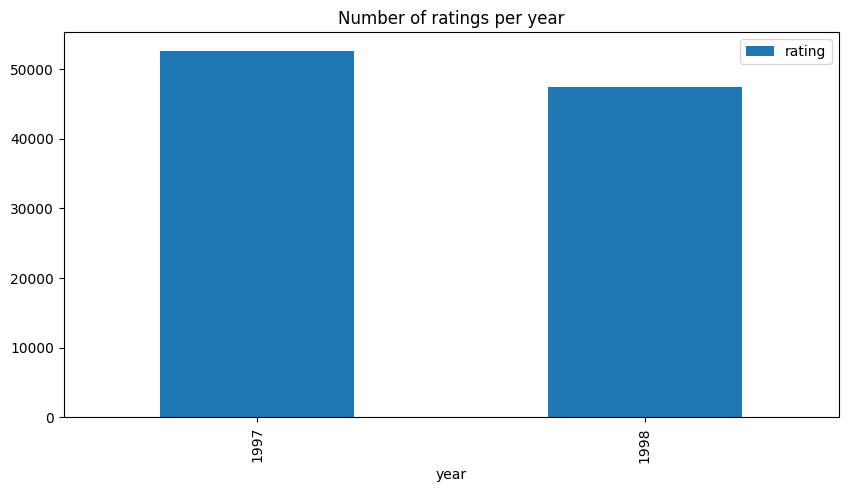

In [14]:
df_rating[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

We can see that around 52% of ratings are available for the year 1997(approximately 52.5k). Now have a look at the monthly distribution of rating.

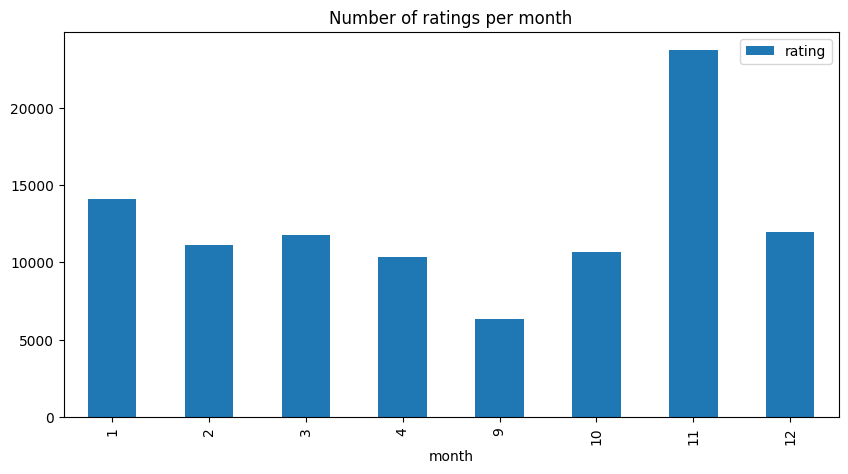

In [15]:
df_temp = df_rating[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp.plot.bar(x='month', y='rating', title='Number of ratings per month', figsize=(10, 5));

It is observed that November month is having highest number of the ratings (approximately 24k) followed by January(approximately 14k).<br>
Now, let's have a look at the monthly total number of ratings each year.

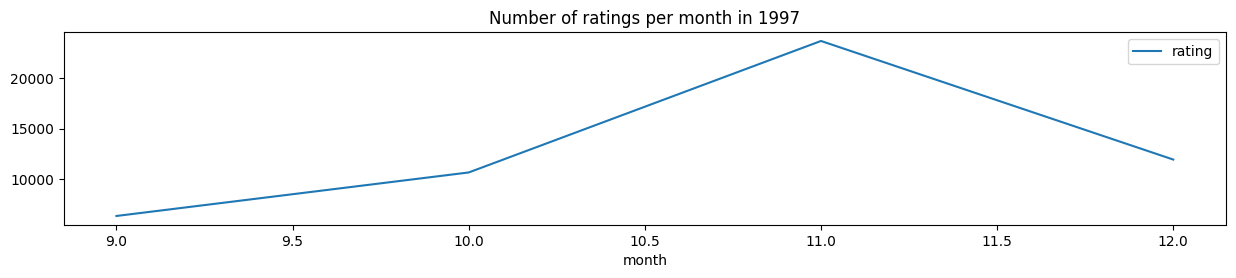

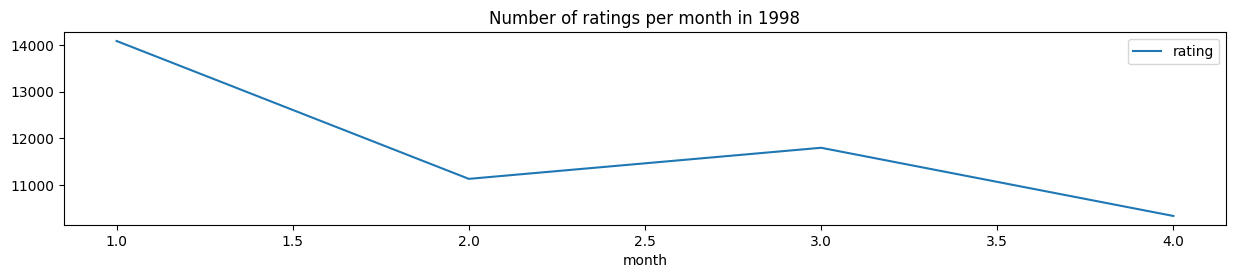

In [16]:
df_temp = df_rating[['year', 'month', 'rating']].groupby(['year', 'month']).count().reset_index()
for year in df_temp['year'].unique():
    df_temp.loc[df_temp['year'] == year].plot('month', 'rating', title='Number of ratings per month in %s' %year, figsize=(15, 2.5))

For 1997, we can see that there are high number of ratings in the month of November. For the year 1998, we can see a negative trend. The data shows that people rated the most movies around the holiday season.

Now let's see the distribution of different rating values. This will give an idea of common rating behaviour of users.


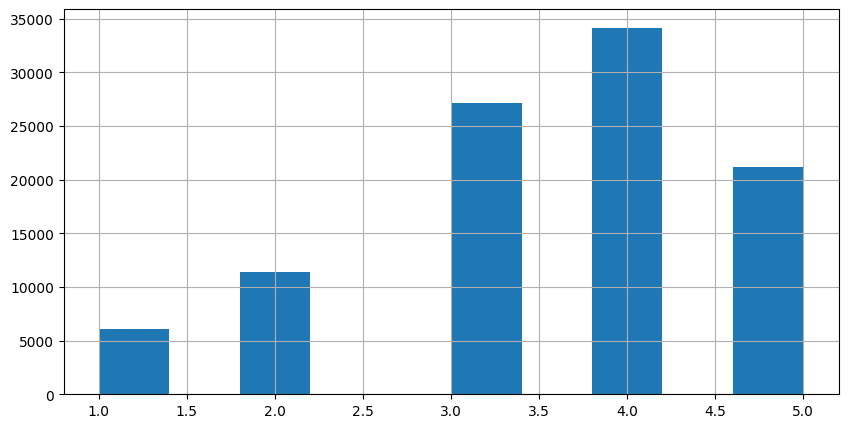

In [17]:
df_rating['rating'].hist(figsize=(10, 5));

We can see that most common rating value is 4 with an approximate count of 34k. As we have 100k ratings we can say that around 34% of ratings are of value 4 followed by approximately 27% and 21% respectively for 3 and 5.  But We can can see that most of the people give rating around 4.<br> 
We can also plot similar plot for each year.

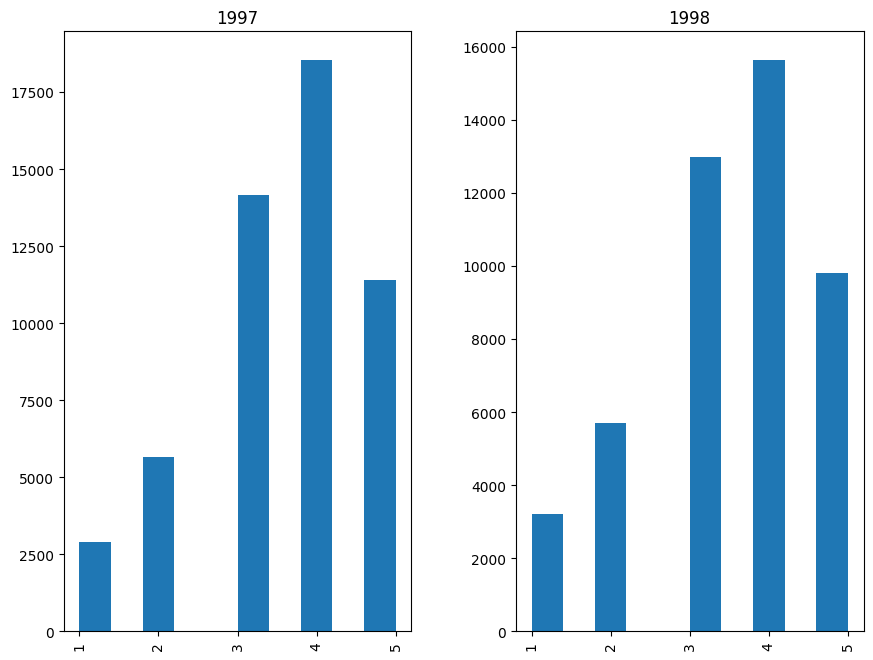

In [18]:
df_rating['rating'].hist(by=df_rating['year'], figsize=(10, 8));

We can observe similar distributions for each year. Now, we can also have a look the rating value distribution per month.

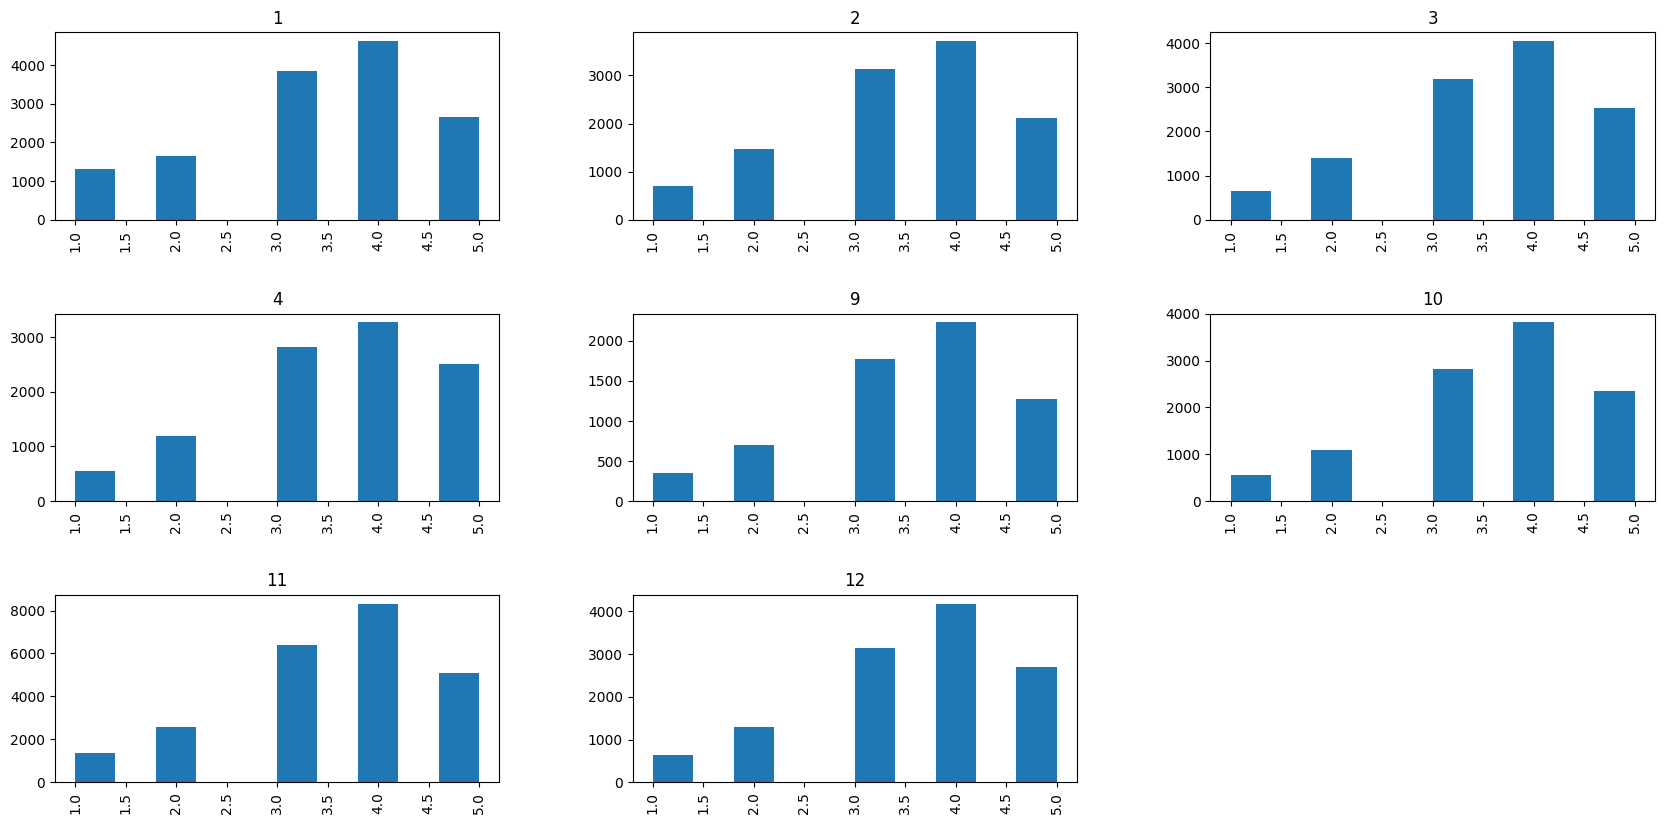

In [19]:
df_rating['rating'].hist(by=df_rating['month'], figsize=(20, 10));

We can see similar distribution as we already observed in the overall and yearly graphs.<br>
we have seen that the overall rating average is approximately 3.5. Now let's look how the ratings change over time. we can also plot lower and upper bounds using standard deviation.

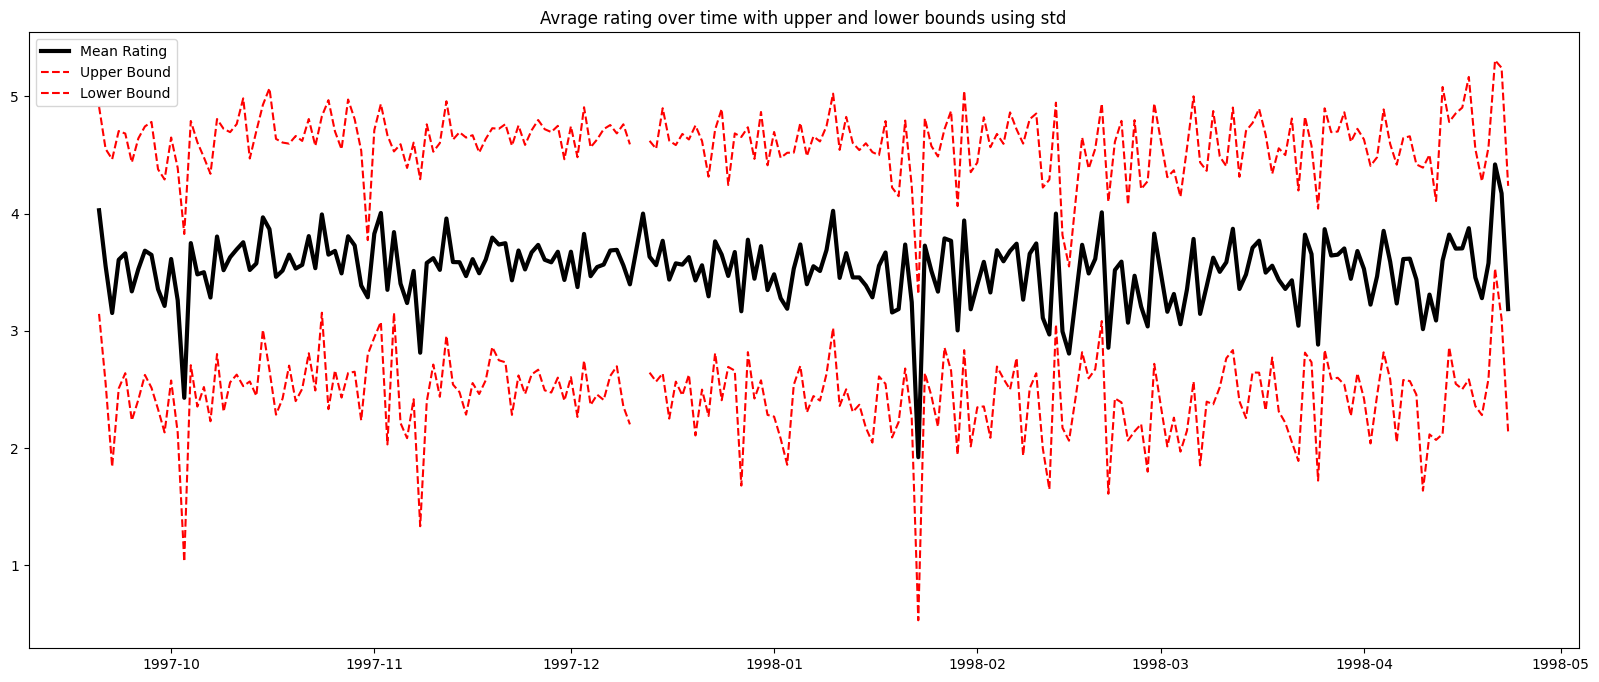

In [20]:
df_temp = df_rating.groupby(['date'])['rating'].agg([np.mean, np.std]).reset_index()
df_temp['upper'] = df_temp['mean'] + df_temp['std']
df_temp['lower'] = df_temp['mean'] - df_temp['std']
plt.figure(figsize=(20,8)) 
plt.plot(df_temp['date'], df_temp['mean'], color="black", linewidth=3.0, label="Mean Rating")
plt.plot(df_temp['date'], df_temp['upper'], color="red", linestyle='--', label="Upper Bound")
plt.plot(df_temp['date'], df_temp['lower'], color="red", linestyle='--', label="Lower Bound")
plt.title('Avrage rating over time with upper and lower bounds using std')
plt.legend()
plt.show()

We can see that the average rating lies between 3 and 4 over the time.

Now let's focus on the users. We have seen that there are 943 unique users. Let's see top 10 users based on number of ratings.

In [21]:
df_rating['user_id'].value_counts().nlargest(n=10)

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: count, dtype: int64

We can see that user with id 405 is the top users with 737 ratings. We can see the distribution of number of reviews per user using box plot and histogram.

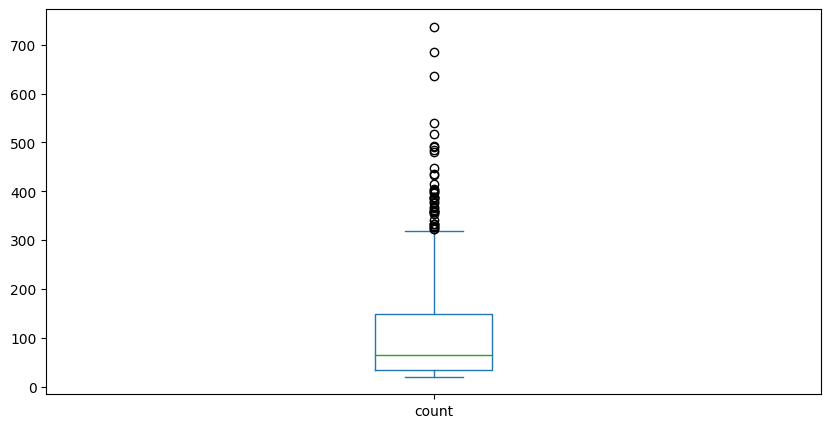

In [22]:
df_rating['user_id'].value_counts().plot.box(figsize=(10, 5));

We can see that median is around 50. We can users with number of reviews more than extreme value(approximately 320).

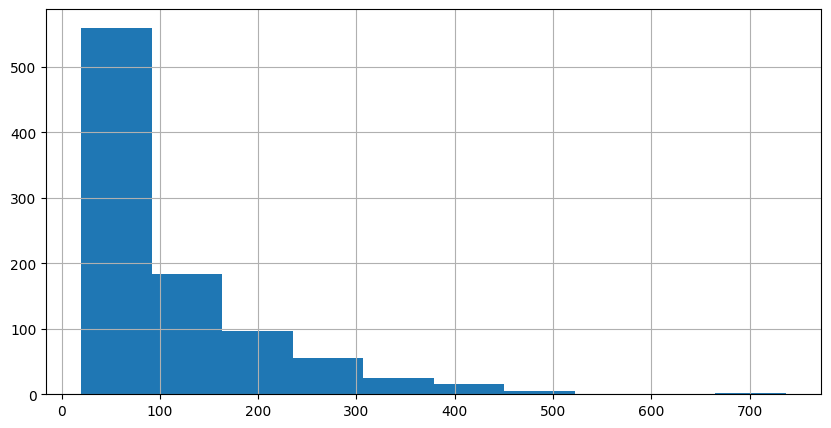

In [23]:
df_rating['user_id'].value_counts().hist(figsize=(10, 5));

From the histogram we can observe that most of the people (around 550) are having number of reviews in the range of 0 to 100. Around 200 people are having 100-150 reviews. ~100 people are having 150-250 reviews.

Let's now see distribution of unique users per year.

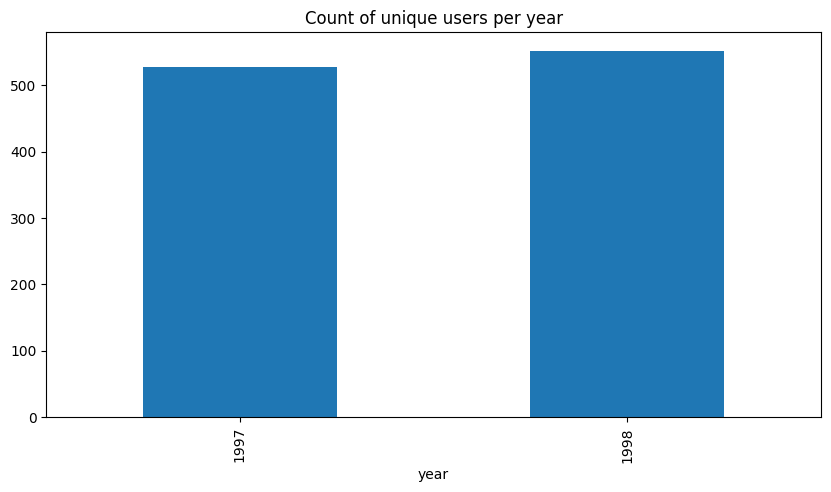

In [24]:
df_rating[['year', 'user_id']].groupby(['year'])['user_id'].nunique().plot.bar(x='year', y='user_id', title='Count of unique users per year', figsize=(10, 5));

we can also check newly added users in consecutive years.<br>

Let's now explore about movies. We have seen that there are 3706 unique movies having ratings. 

Let's see top 10 movies based on number of reviews.

In [25]:
df_rating['movie_id'].value_counts().nlargest(n=10)

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: count, dtype: int64

Movie with id 50 is having more number of reviews. Now let's see the distribution of number of reviews.

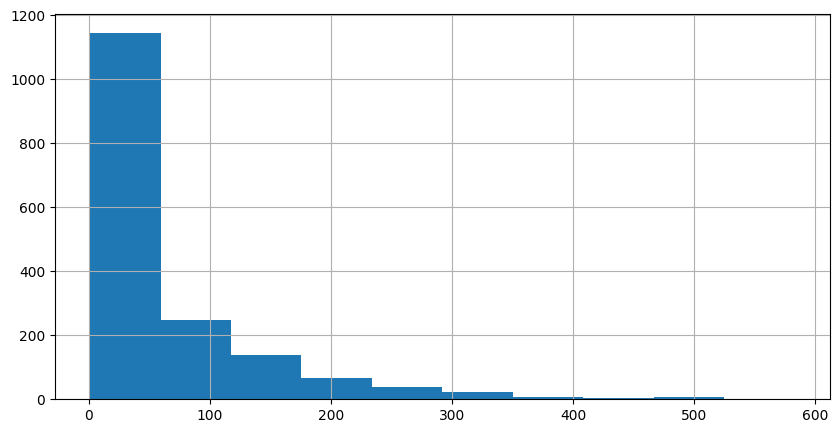

In [26]:
df_rating['movie_id'].value_counts().hist(figsize=(10, 5));

We can observe that approximately 1200 movies having number of reviews in the range of 1-50. Rest of the movies are having more than 50(approximate) reviews.

In [27]:
df_user.head()

,user_id,age,gender,occupation,zipcode,age_range
0,1,24,M,technician,85711,19-25
1,2,53,F,other,94043,46-55
2,3,23,M,writer,32067,19-25
3,4,24,M,technician,43537,19-25
4,5,33,F,other,15213,26-35


## 3 User Data Analysis


First of all let's look at first few entries from users data

In [28]:
df_user.head()

,user_id,age,gender,occupation,zipcode,age_range
0,1,24,M,technician,85711,19-25
1,2,53,F,other,94043,46-55
2,3,23,M,writer,32067,19-25
3,4,24,M,technician,43537,19-25
4,5,33,F,other,15213,26-35


In [29]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     943 non-null    int64   
 1   age         943 non-null    int64   
 2   gender      943 non-null    object  
 3   occupation  943 non-null    object  
 4   zipcode     943 non-null    object  
 5   age_range   943 non-null    category
dtypes: category(1), int64(2), object(3)
memory usage: 38.2+ KB


There are 943 users with 5 attributes.

In [30]:
print('#Unique occupation:', df_user.occupation.nunique())
print('#Unique zipcodes:', df_user.zipcode.nunique())
print('Gender distribution:\n', df_user['gender'].value_counts())

#Unique occupation: 21
#Unique zipcodes: 795
Gender distribution:
 gender
M    670
F    273
Name: count, dtype: int64


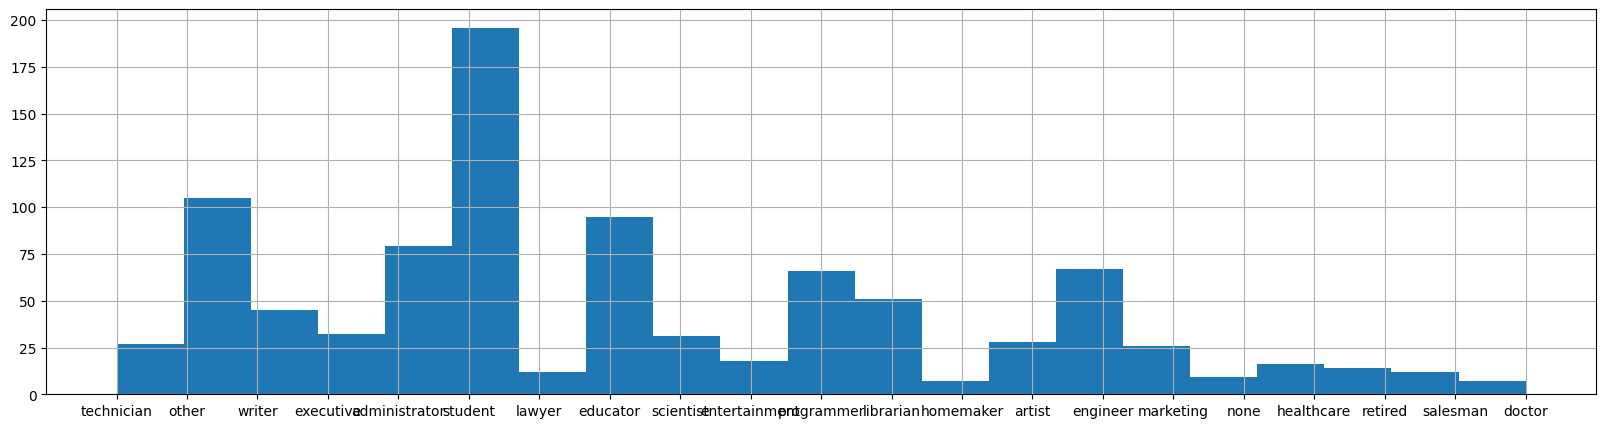

In [31]:
df_user['occupation'].hist(bins=21, figsize=(20, 5));

We can see that there is 1 occupation group having approximately 200 users, 2 having 100 and so on.

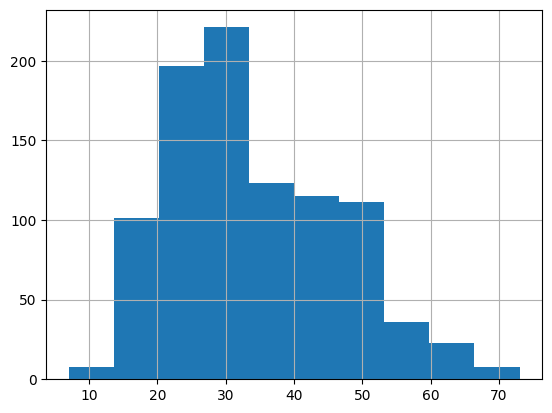

In [32]:
df_user['age'].hist();

We can see that most of the users(approximately 400) belongs to the age group of 19-35. 

## 4. Movie Data

First of all let's look at first few entries from movies data

In [33]:
df_movie.head()

,movie_id,title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_movie['release_year'] = df_movie.title.str.extract("\((\d{4})\)", expand=True).astype(str)

In [35]:
df_movie['release_year'] = pd.to_datetime(df_movie['release_date'], format='%Y')
df_movie['release_year'] = df_movie['release_year'].dt.year

In [36]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   title               1682 non-null   object        
 2   release_date        1681 non-null   datetime64[ns]
 3   video_release_date  0 non-null      float64       
 4   IMDb URL            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   Action              1682 non-null   int64         
 7   Adventure           1682 non-null   int64         
 8   Animation           1682 non-null   int64         
 9   Children's          1682 non-null   int64         
 10  Comedy              1682 non-null   int64         
 11  Crime               1682 non-null   int64         
 12  Documentary         1682 non-null   int64         
 13  Drama               1682 non-null   int64       

In [37]:
print('#Unique movie release years:', df_movie.release_date.dt.year.nunique())

#Unique movie release years: 71


In [38]:
temp = df_movie.release_date.dt.year.unique()
temp.sort()
print(temp)

[1922. 1926. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939.
 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951.
 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998.   nan]


We can see that there are details of 1682 movies with release years from 1922 to 1998.

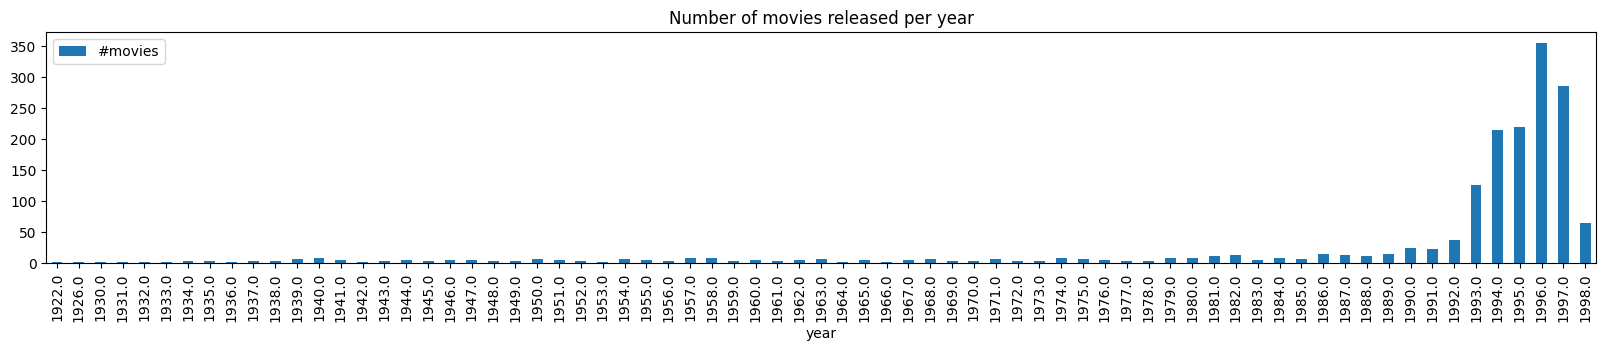

In [39]:
df_temp = df_movie[['release_year', 'movie_id']].groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movie_id':'#movies'})
df_temp.plot.bar('year', '#movies', title='Number of movies released per year', figsize=(20, 3));

We can see that most of the movies released in the dataset during 90s.